# Evaluate the result of Experiments

The aim of this script is to standardize the evaluation of several experiments.

In [1]:
import pickle
from myLibrary import Experiment
import os
import ipywidgets as widgets
from IPython.display import display

In [11]:
report_directory = os.path.join(os.getcwd(), f'data/reports')

def build_UI():
    # Select Model-------------------------------------------------------------------------------
    global report_widget
    report_list = os.listdir(report_directory)
    report_widget = widgets.Select(
        options=report_list,
        value=report_list[0],
        # rows=10,
        description='Reports:',
        disabled=False
    )
    display(report_widget)

build_UI()

Select(description='Reports:', options=('report_B_0.pickle', 'report_test.pickle', 'Most_basic_PINN.pickle', '…

In [3]:
filename = report_widget.value
#filename = "Most_basic_LSTM"

# open the file for reading in binary mode
report: Experiment
with open(f'data/reports/{filename}', 'rb') as f:
    # load the object from the file using pickle.load()
    report = pickle.load(f)

In [4]:
report.print_settings()

Experiment: report_B_0
First test with approach B, excl. recurrent forecasting
---------------------------------------
Stations: [['NWCL1', '2013'], ['NWCL1', '2014'], ['NWCL1', '2015'], ['NWCL1', '2016'], ['NWCL1', '2017'], ['NWCL1', '2018'], ['NWCL1', '2019'], ['NWCL1', '2020'], ['NWCL1', '2021'], ['NWCL1', '2022']]
Years: ['not available']
NaN_Threshold: 0.33
Features: ['ATMP', 'WTMP', 'PRES', 'WDIR', 'WSPD']
ERA5: True, Stationary Shift: 1, lag: 1, Test-Hours:24

---------------------------------------
Normalized: True

---------------------------------------
Internal Model name: lstm_2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            71168     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                    

In [5]:
report.print_metrics()

One-Shot-Forecasting:
MAE: -1.0 	MSE: -1.0

Recurrent-Forecasting:
MAE: -1.0 	MSE: -1.0


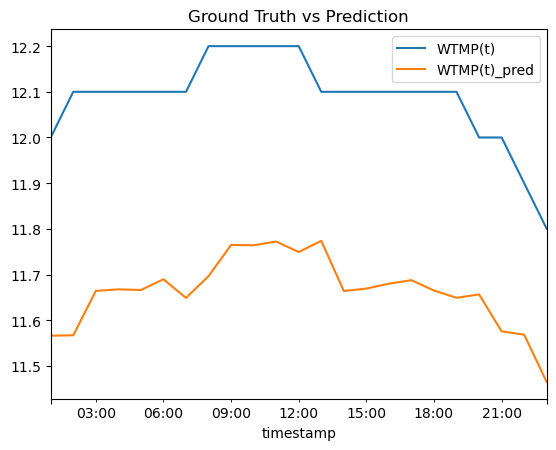

In [6]:
report.print_one_shot_WTMP()

KeyError: "None of [Index(['WTMP(t)', 'WTMP(t)_pred'], dtype='object')] are in the [columns]"

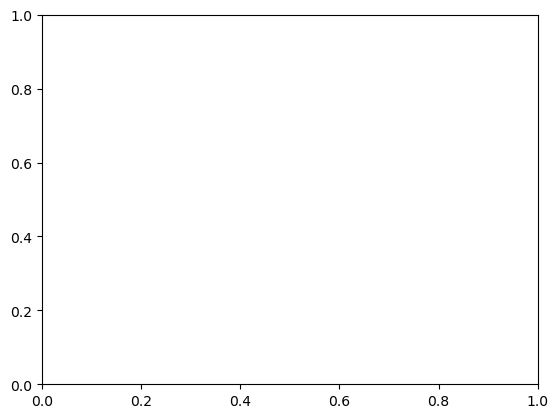

In [7]:
report.print_recursive_WTMP()

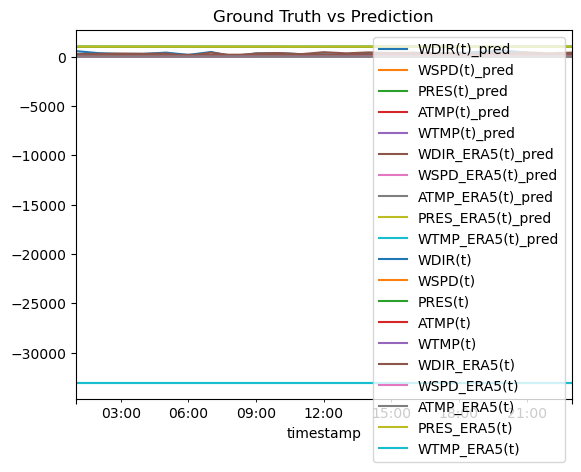

In [8]:
report.print_one_shot_forecast()

TypeError: no numeric data to plot

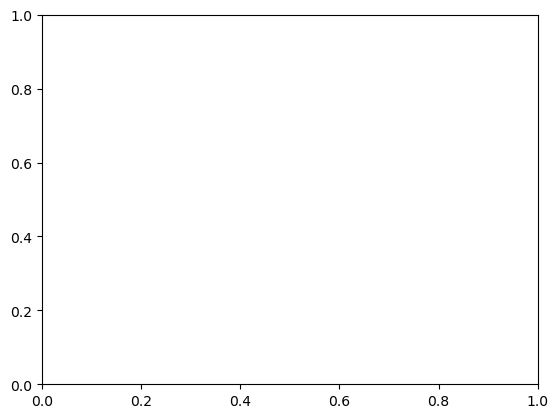

In [9]:
report.print_recursive_forecast()